In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('./kc_house_data.csv',sep=',',encoding='latin1')
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [108]:
1.2. Изучите стоимости недвижимости

SyntaxError: invalid syntax (3839188605.py, line 1)

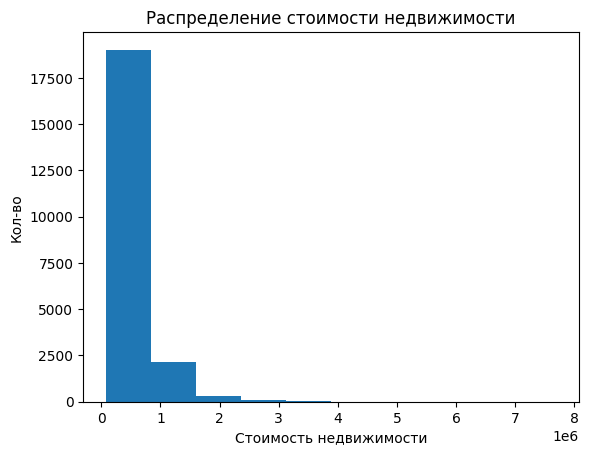

In [4]:
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кол-во');

In [ ]:
Мы видим, что большая часть домов стоит в проделах 1000000.
С учётом общего числа домов в таблице данных 
кол-во домов дороже 1000000 составляет около 10% от общего числа домов.

In [ ]:
1.3. Изучите распределение квадратуры жилой

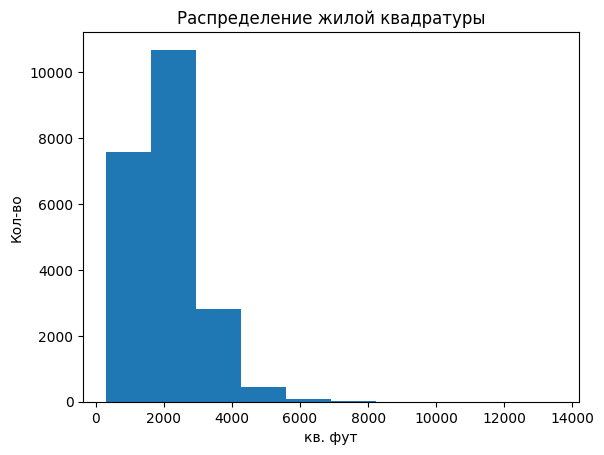

In [5]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой квадратуры')
plt.xlabel('кв. фут')
plt.ylabel('Кол-во');

In [ ]:
На гистограмме выше мы видим, что самая большая группа домов (таких больше 10000) - 
дома площадью от 2000 до 3000 кв. футов.

In [ ]:
1.4. Изучите распределение года постройки

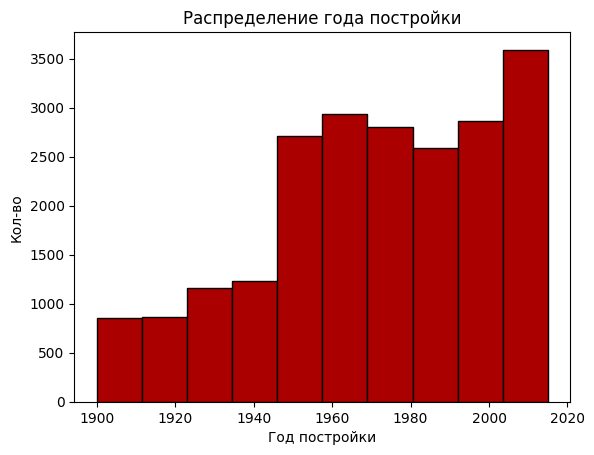

In [6]:
plt.hist(df['yr_built'], color='#AA0000', edgecolor='black')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

In [ ]:
Мы видим, что более 3500 домов - новые дома, постороенные после 2000 года.
Также можно отметить, что дома, построенные в 40-х годах ХХ века
и ранее встречаются довольно редко.


In [ ]:
2.1. Изучите распределение домов от наличия вида на набережную

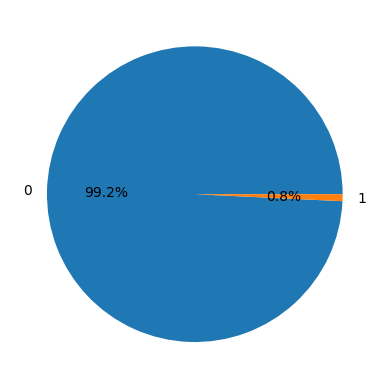

In [7]:
data = df['waterfront'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%');

In [ ]:
Мы видим, что домов с видом на набережную очень мало, менее 1% от общего количества домов.

In [ ]:
2.2. Изучите распределение этажей домов


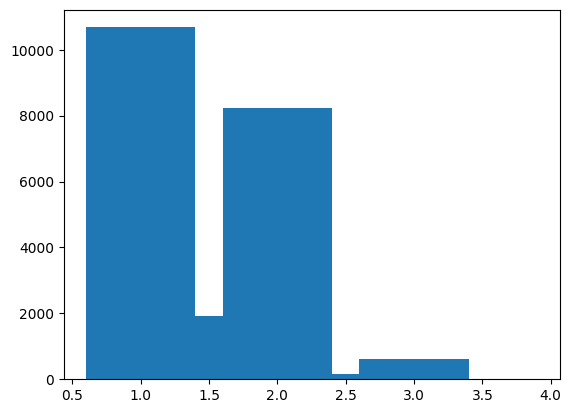

In [8]:
data = df['floors'].value_counts()
data

names = data.index
values = data.values

plt.bar(names, values);
plt.xticks();

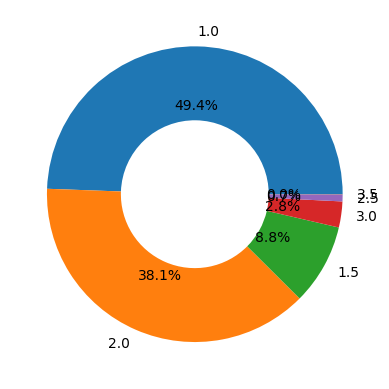

In [117]:
data = df['floors'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%', wedgeprops=dict(width=0.5));

In [ ]:
Мы видим, что согласно данным дома в основном одноэтажные.
Второй крупной группой являются двухэтажные дома.
Также существуют полутораэтажные дома и они составляют третью по существенности (8,8%) группу.
Дома высотностью выше 2 этажей встречаюся крайне редко.

In [ ]:
2.3. Изучите распределение состояния домов

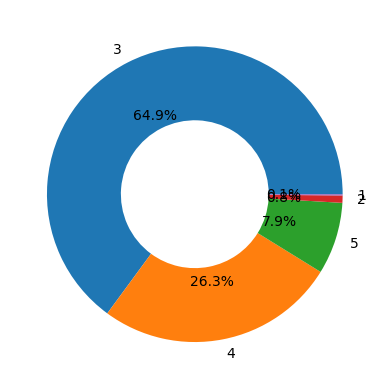

In [9]:
data = df['condition'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%', wedgeprops=dict(width=0.5));

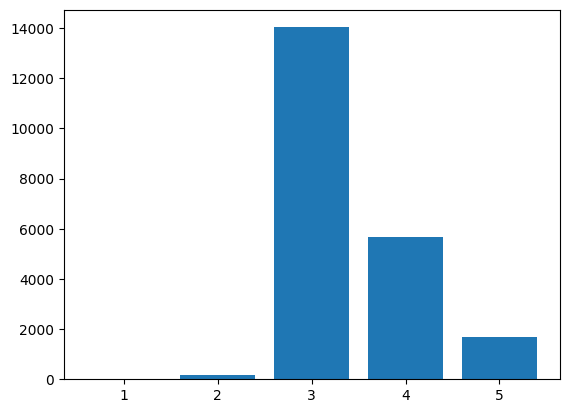

In [10]:
data = df['condition'].value_counts()
data

names = data.index
values = data.values

plt.bar(names, values);
plt.xticks();

In [ ]:
Мы можем заметить, что самая многочисленная группа (почти 2/3) - 
это дома в среднем состоянии (3 балла из 5).
Домов в хорошем состоянии (4 балла из 5) также немало, около четверти от общего числа домов.
Домов в отличном состоянии (5 баллов из 5) совсем немного, менее 1/10 от общего числа домов.
Очень маленькая часть домов находятся в плохом или ужасном состоянии (2 и 1 балл из 5 соответственно).

In [ ]:
3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,
с применением не менее 3 диаграмм из урока.

In [ ]:
Для начала я решил проверить, есть ли корреляция между ценой и следующими факторами:
- кол-во этажей
- жилая площадь
- grade/рейтинг (условный рейтинг со значениями от 1 до 8).

In [21]:
corr_matrix = df[['price', 'floors', 'sqft_living', 'grade']].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,price,floors,sqft_living,grade
price,1.0,0.3,0.7,0.7
floors,0.3,1.0,0.4,0.5
sqft_living,0.7,0.4,1.0,0.8
grade,0.7,0.5,0.8,1.0


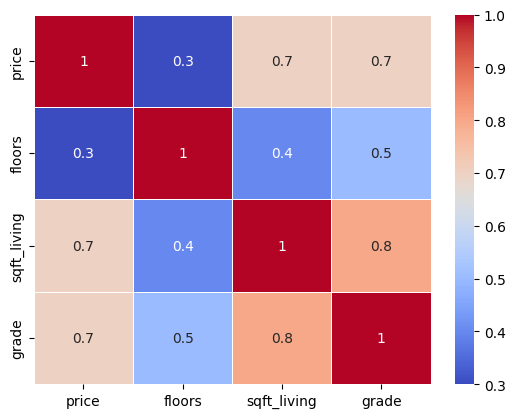

In [22]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

In [ ]:
На тепловой карте выше мы можем видеть, что существует 
определённая корреляция между стоимостями домов и
их рейтингом, а также с жилой площадью.

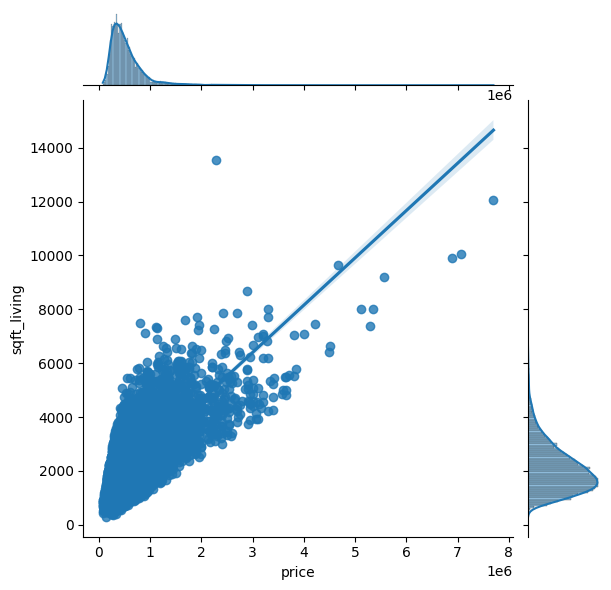

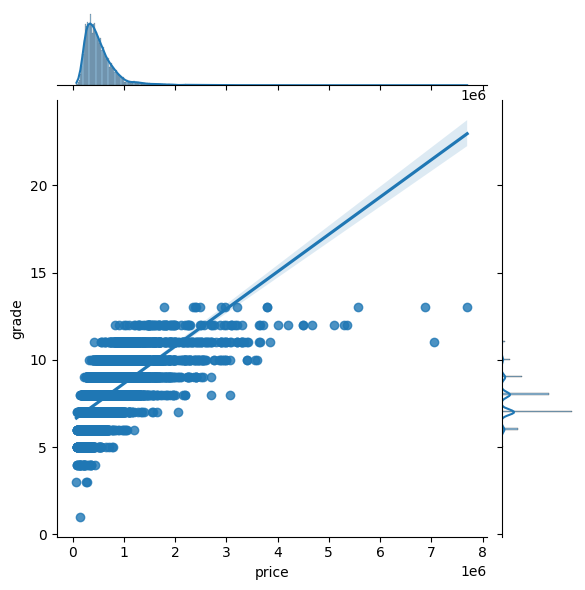

In [14]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');
	

In [ ]:
В целом мы видим визуальное подтверждение увиденного ранее в корреляционном анализе.
Мы видим, что самые дорогие дома обладают наиболее высоким рейтингом.
При этом дом с наибольшей жилой площадью стоит порядка 2-3 миллионов,
в то время как есть дома стоимостью 7-8 миллионов с меньшей жилой площадью.

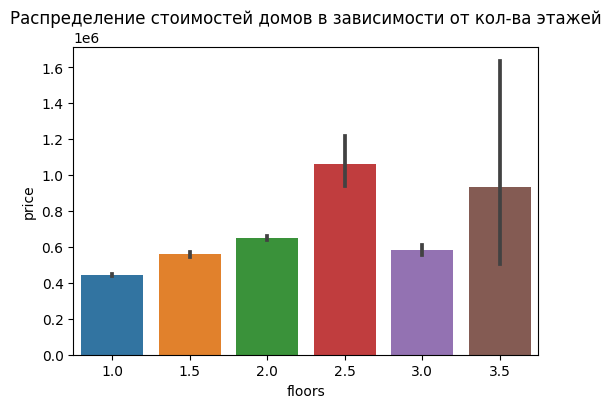

In [24]:
plt.figure(figsize=(6,4))

sns.barplot(x=df['floors'], y=df['price'])

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Распределение стоимостей домов в зависимости от кол-ва этажей');


In [ ]:
Мне показалось странным, что корреляция между кол-вом этажей в доме
и его стоимостью настолько низкая (в районе 30%).
Я решил сделать столбчатую диаграмму с кол-вом этажей в качестве оси абсцисс.
Как оказалось, дома с количеством этажей 2,5 стоят дороже трёхэтажных домов,
что рушит тренд, который мы видим в домах с этажностью от одного до двух этажей:
чем больше этажей, тем выше стоимость.